In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
from importlib import reload
import shlex
import medvqa
from medvqa.train_vqa import debug_main

In [17]:
reload(medvqa.datasets)
reload(medvqa.datasets.vqa)
reload(medvqa.training.vqa)
reload(medvqa.train_vqa)

<module 'medvqa.train_vqa' from '/home/pamessina/medvqa/medvqa/train_vqa.py'>

In [3]:
output = debug_main(args=shlex.split(
    ' '.join([
    '--epochs 100',
    '--batches-per-epoch 400',
    '--batch-size 70',
    '--num-workers 6',
    '--optimizer-name "adamw"',
    '--scheduler "warmup+decay"',
    '--lr 1e-6',
    '--warmup-and-decay-args "1e-6,8,4e-4,92,5e-6"',
    '--use-mimiccxr',
    '--use-iuxray',
    '--use-chexpert',
    '--use-cxr14',
    '--use-vinbig',
    '--mimiccxr-include-chexpert-mode',
    '--iuxray-include-chexpert-mode',
    '--chexpert-mode "vqa"',
    '--iuxray-train-with-all',
    '--vinbig-training-data "all"',
    '--mimiccxr-weight 1.0',
    '--mimiccxr-weight-chexpert-mode 0.8',
    '--iuxray-weight 0.2',
    '--iuxray-weight-chexpert-mode 0.16',
    '--chexpert-weight 0.5',
    '--cxr14-weight 0.4',
    '--vinbig-weight 0.4',
    '--imagenet-pretrained',
    '--mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json"',
    '--iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json"',
    '--classify-orientation',
    '--classify-chexpert',
    '--mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl"',
    '--iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl"',
    '--classify-questions',
    '--n-questions 97',
    '--mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl"',
    '--iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl"',
    '--balanced-split',
    '--mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl"',
    '--iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl"',
    '--balanced-dataloading',
    '--question-encoding "one-hot"',
    '--answer-decoding "transformer"',
    '--binary-loss-name "wbce-c"',
    '--img-aug-mode "random-color-and-spatial"',
    '--use-amp',
    '--merge-findings',
    '--no-save',
    ])
))

script's arguments:
   epochs: 100
   batches_per_epoch: 400
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: True
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   tran

	len(question_datasets) = 51
generating training and validation dataloaders ...
num_workers = 6
Generating perfectly balanced train dataset in chexpert mode ...
label = 0, onehot=97, len(pos_indices)=1414, len(neg_indices)=2370
label = 1, onehot=98, len(pos_indices)=382, len(neg_indices)=3402
label = 2, onehot=99, len(pos_indices)=667, len(neg_indices)=3117
label = 3, onehot=100, len(pos_indices)=230, len(neg_indices)=3554
label = 4, onehot=101, len(pos_indices)=701, len(neg_indices)=3083
label = 5, onehot=102, len(pos_indices)=150, len(neg_indices)=3634
label = 6, onehot=103, len(pos_indices)=40, len(neg_indices)=3744
label = 7, onehot=104, len(pos_indices)=134, len(neg_indices)=3650
label = 8, onehot=105, len(pos_indices)=360, len(neg_indices)=3424
label = 9, onehot=106, len(pos_indices)=99, len(neg_indices)=3685
label = 10, onehot=107, len(pos_indices)=288, len(neg_indices)=3496
label = 11, onehot=108, len(pos_indices)=70, len(neg_indices)=3714
label = 12, onehot=109, len(pos_indice

In [4]:
output.keys()

dict_keys(['mimiccxr_vqa_trainer', 'iuxray_vqa_trainer', 'chexpert_vqa_trainer', 'cxr14_vqa_trainer', 'vinbig_vqa_trainer'])

In [16]:
!python ../train_vqa.py \
        --epochs 100 \
        --batches-per-epoch 400 \
        --batch-size 70 \
        --num-workers 6 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,8,4e-4,92,5e-6" \
        --use-mimiccxr \
        --use-iuxray \
        --use-chexpert \
        --use-cxr14 \
        --use-vinbig \
        --mimiccxr-include-chexpert-mode \
        --iuxray-include-chexpert-mode \
        --chexpert-mode "vqa" \
        --iuxray-train-with-all \
        --vinbig-training-data 'all' \
        --mimiccxr-weight 1.0 \
        --mimiccxr-weight-chexpert-mode 0.8 \
        --iuxray-weight 0.2 \
        --iuxray-weight-chexpert-mode 0.16 \
        --chexpert-weight 0.5 \
        --cxr14-weight 0.4 \
        --vinbig-weight 0.4 \
        --imagenet-pretrained \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json" \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json" \
        --classify-orientation \
        --classify-chexpert \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl" \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl" \
        --classify-questions \
        --n-questions 97 \
        --mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl" \
        --iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl" \
        --balanced-split \
        --mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl" \
        --iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl" \
        --balanced-dataloading \
        --question-encoding "one-hot" \
        --answer-decoding "transformer" \
        --binary-loss-name "wbce-c" \
        --img-aug-mode "random-color-and-spatial" \
        --merge-findings \
        --use-amp \
        --save

script's arguments:
   epochs: 100
   batches_per_epoch: 400
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: True
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   tran

Generating balanced validation dataset in chexpert mode ...
label = 0, onehot=97, len(pos_indices)=40, len(neg_indices)=40
label = 1, onehot=98, len(pos_indices)=40, len(neg_indices)=40
label = 2, onehot=99, len(pos_indices)=40, len(neg_indices)=40
label = 3, onehot=100, len(pos_indices)=40, len(neg_indices)=40
label = 4, onehot=101, len(pos_indices)=40, len(neg_indices)=40
label = 5, onehot=102, len(pos_indices)=40, len(neg_indices)=40
label = 6, onehot=103, len(pos_indices)=40, len(neg_indices)=40
label = 7, onehot=104, len(pos_indices)=40, len(neg_indices)=40
label = 8, onehot=105, len(pos_indices)=40, len(neg_indices)=40
label = 9, onehot=106, len(pos_indices)=40, len(neg_indices)=40
label = 10, onehot=107, len(pos_indices)=40, len(neg_indices)=40
label = 11, onehot=108, len(pos_indices)=31, len(neg_indices)=40
label = 12, onehot=109, len(pos_indices)=28, len(neg_indices)=40
label = 13, onehot=110, len(pos_indices)=40, len(neg_indices)=40
len(self.val_dataset__chexpert_mode) = 1099

_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
_get_output_transform(): valid_class_indices = [0, 8, 2, 6, 5, 10, 14, 15, 16, 17, 18, 19, 20, 7, 9]
_get_output_transform(): valid_class_indices = [0, 8, 2, 6, 5, 10, 14, 15, 16, 17, 18, 19, 20, 7, 9]
_get_output_transform(): valid_class_indices =

(2) Validation stage ...
cD 0.45712, wmdcmp 0.09535, oracc 0.97894, chxlmicf1 0.50034, chxlmacf1 0.44939, chxlacc 0.64471, chxlrocaucmic 0.75092, chxlrocaucmac 0.72802, qlmicf1 0.28195, qlmacf1 0.19895, ema 0.60601, 38.97 secs
Adjusting learning rate of group 0 to 4.0000e-04.
---- Epoch 9/100
(1) Training stage (lr = 0.000400) ...
loss 5.93298, a_loss 1.49260, cD 0.54939, wmdcmp 0.09523, oracc 0.97458, orien_loss 0.04812, chxlmicf1 0.44943, chxlmacf1 0.41332, chx_loss 0.97550, chxlacc 0.65988, chxlrocaucmic 0.73127, chxlrocaucmac 0.71463, qlmicf1 0.25829, qlmacf1 0.17332, ql_loss 0.92287, gacc 0.88829, gloss 0.28944, cxr14micf1 0.23783, cxr14macf1 0.26273, cxr14_loss 1.20310, vnbgmicf1 0.42503, vnbgmacf1 0.32643, vnbg_loss 1.24464, ema 0.57934, 129.80 secs
(2) Validation stage ...
cD 0.64133, wmdcmp 0.11824, oracc 0.98222, chxlmicf1 0.47869, chxlmacf1 0.44385, chxlacc 0.62323, chxlrocaucmic 0.73388, chxlrocaucmac 0.73763, qlmicf1 0.26609, qlmacf1 0.20415, ema 0.58053, 39.25 secs
Adjust

cD 0.75419, wmdcmp 0.14714, oracc 0.93089, chxlmicf1 0.52805, chxlmacf1 0.47530, chxlacc 0.69950, chxlrocaucmic 0.77896, chxlrocaucmac 0.76368, qlmicf1 0.33928, qlmacf1 0.23828, ema 0.65150, 40.73 secs
Adjusting learning rate of group 0 to 2.3687e-04.
---- Epoch 20/100
(1) Training stage (lr = 0.000237) ...
loss 4.56241, a_loss 1.00017, cD 1.21158, wmdcmp 0.19307, oracc 0.98223, orien_loss 0.02587, chxlmicf1 0.51216, chxlmacf1 0.46692, chx_loss 0.86270, chxlacc 0.71574, chxlrocaucmic 0.79439, chxlrocaucmac 0.78096, qlmicf1 0.34190, qlmacf1 0.21561, ql_loss 0.79441, gacc 0.95614, gloss 0.11963, cxr14micf1 0.32918, cxr14macf1 0.33542, cxr14_loss 0.95584, vnbgmicf1 0.56916, vnbgmacf1 0.43551, vnbg_loss 0.72646, ema 0.69143, 134.30 secs
(2) Validation stage ...
cD 0.85622, wmdcmp 0.15760, oracc 0.99080, chxlmicf1 0.52440, chxlmacf1 0.48058, chxlacc 0.67086, chxlrocaucmic 0.77326, chxlrocaucmac 0.77465, qlmicf1 0.32895, qlmacf1 0.24191, ema 0.64695, 42.37 secs
Adjusting learning rate of gro

(2) Validation stage ...
cD 0.86158, wmdcmp 0.16436, oracc 0.98861, chxlmicf1 0.54351, chxlmacf1 0.49088, chxlacc 0.71084, chxlrocaucmic 0.78854, chxlrocaucmac 0.77491, qlmicf1 0.36308, qlmacf1 0.24897, ema 0.71520, 42.79 secs
Adjusting learning rate of group 0 to 1.4027e-04.
---- Epoch 31/100
(1) Training stage (lr = 0.000140) ...
loss 4.49681, a_loss 0.92838, cD 1.38480, wmdcmp 0.21479, oracc 0.98363, orien_loss 0.02003, chxlmicf1 0.54108, chxlmacf1 0.49409, chx_loss 0.79601, chxlacc 0.74062, chxlrocaucmic 0.82231, chxlrocaucmac 0.81201, qlmicf1 0.38374, qlmacf1 0.23794, ql_loss 0.73687, gacc 0.97400, gloss 0.07352, cxr14micf1 0.38288, cxr14macf1 0.37388, cxr14_loss 0.89195, vnbgmicf1 0.64297, vnbgmacf1 0.50900, vnbg_loss 0.54210, ema 0.73330, 136.84 secs
(2) Validation stage ...
cD 0.86965, wmdcmp 0.16263, oracc 0.97504, chxlmicf1 0.55316, chxlmacf1 0.49557, chxlacc 0.72617, chxlrocaucmic 0.80221, chxlrocaucmac 0.78014, qlmicf1 0.37122, qlmacf1 0.25877, ema 0.69973, 42.57 secs
Adjus

(2) Validation stage ...
cD 0.86186, wmdcmp 0.16900, oracc 0.98877, chxlmicf1 0.55791, chxlmacf1 0.50543, chxlacc 0.71772, chxlrocaucmic 0.80495, chxlrocaucmac 0.79106, qlmicf1 0.36272, qlmacf1 0.27122, ema 0.72247, 43.03 secs
Adjusting learning rate of group 0 to 8.3067e-05.
---- Epoch 42/100
(1) Training stage (lr = 0.000083) ...
loss 4.21082, a_loss 0.88666, cD 1.48314, wmdcmp 0.22710, oracc 0.98405, orien_loss 0.01848, chxlmicf1 0.56097, chxlmacf1 0.51169, chx_loss 0.75304, chxlacc 0.75670, chxlrocaucmic 0.84061, chxlrocaucmac 0.83095, qlmicf1 0.41514, qlmacf1 0.25257, ql_loss 0.69331, gacc 0.97514, gloss 0.06612, cxr14micf1 0.41337, cxr14macf1 0.40787, cxr14_loss 0.83272, vnbgmicf1 0.71388, vnbgmacf1 0.62532, vnbg_loss 0.42568, ema 0.75352, 136.57 secs
(2) Validation stage ...
cD 0.86658, wmdcmp 0.17099, oracc 0.98939, chxlmicf1 0.56332, chxlmacf1 0.50750, chxlacc 0.73139, chxlrocaucmic 0.80615, chxlrocaucmac 0.78605, qlmicf1 0.38805, qlmacf1 0.27273, ema 0.71065, 43.20 secs
Adjus

cD 0.88849, wmdcmp 0.17071, oracc 0.99002, chxlmicf1 0.57019, chxlmacf1 0.51544, chxlacc 0.73960, chxlrocaucmic 0.81454, chxlrocaucmac 0.78880, qlmicf1 0.39879, qlmacf1 0.27570, ema 0.72884, 43.18 secs
Adjusting learning rate of group 0 to 4.9191e-05.
---- Epoch 53/100
(1) Training stage (lr = 0.000049) ...
loss 3.80261, a_loss 0.86862, cD 1.54086, wmdcmp 0.23450, oracc 0.98589, orien_loss 0.01293, chxlmicf1 0.57896, chxlmacf1 0.53148, chx_loss 0.71971, chxlacc 0.76968, chxlrocaucmic 0.85286, chxlrocaucmac 0.84487, qlmicf1 0.44127, qlmacf1 0.27361, ql_loss 0.66192, gacc 0.98043, gloss 0.05495, cxr14micf1 0.42806, cxr14macf1 0.42977, cxr14_loss 0.80149, vnbgmicf1 0.74151, vnbgmacf1 0.67349, vnbg_loss 0.35929, ema 0.76973, 136.91 secs
(2) Validation stage ...
cD 0.92045, wmdcmp 0.17415, oracc 0.98674, chxlmicf1 0.56337, chxlmacf1 0.51097, chxlacc 0.73397, chxlrocaucmic 0.80874, chxlrocaucmac 0.78989, qlmicf1 0.40001, qlmacf1 0.27763, ema 0.73794, 43.09 secs
Adjusting learning rate of gro

(2) Validation stage ...
cD 0.92014, wmdcmp 0.17631, oracc 0.99002, chxlmicf1 0.56708, chxlmacf1 0.51218, chxlacc 0.73982, chxlrocaucmic 0.81303, chxlrocaucmac 0.78917, qlmicf1 0.40273, qlmacf1 0.27991, ema 0.73885, 43.41 secs
Adjusting learning rate of group 0 to 2.9130e-05.
---- Epoch 64/100
(1) Training stage (lr = 0.000029) ...
loss 3.92106, a_loss 0.85328, cD 1.59570, wmdcmp 0.23825, oracc 0.98666, orien_loss 0.01009, chxlmicf1 0.58478, chxlmacf1 0.53767, chx_loss 0.70074, chxlacc 0.77519, chxlrocaucmic 0.85827, chxlrocaucmac 0.85122, qlmicf1 0.44738, qlmacf1 0.27726, ql_loss 0.64672, gacc 0.98514, gloss 0.04207, cxr14micf1 0.43405, cxr14macf1 0.43701, cxr14_loss 0.78354, vnbgmicf1 0.78032, vnbgmacf1 0.73601, vnbg_loss 0.30992, ema 0.76978, 136.78 secs
(2) Validation stage ...
cD 0.90991, wmdcmp 0.17435, oracc 0.98830, chxlmicf1 0.57022, chxlmacf1 0.51211, chxlacc 0.74402, chxlrocaucmic 0.81400, chxlrocaucmac 0.78795, qlmicf1 0.40142, qlmacf1 0.28221, ema 0.73521, 43.41 secs
Adjus

(2) Validation stage ...
cD 0.94300, wmdcmp 0.17856, oracc 0.98939, chxlmicf1 0.57136, chxlmacf1 0.51514, chxlacc 0.74645, chxlrocaucmic 0.81167, chxlrocaucmac 0.78874, qlmicf1 0.40809, qlmacf1 0.28257, ema 0.73703, 42.63 secs
Adjusting learning rate of group 0 to 1.7250e-05.
---- Epoch 75/100
(1) Training stage (lr = 0.000017) ...
loss 3.62253, a_loss 0.84568, cD 1.61828, wmdcmp 0.24311, oracc 0.98603, orien_loss 0.01175, chxlmicf1 0.59446, chxlmacf1 0.54887, chx_loss 0.68258, chxlacc 0.78283, chxlrocaucmic 0.86618, chxlrocaucmac 0.85903, qlmicf1 0.45472, qlmacf1 0.28007, ql_loss 0.63256, gacc 0.98271, gloss 0.04551, cxr14micf1 0.43527, cxr14macf1 0.43985, cxr14_loss 0.78316, vnbgmicf1 0.78918, vnbgmacf1 0.74168, vnbg_loss 0.29014, ema 0.78126, 137.06 secs
(2) Validation stage ...
cD 0.93933, wmdcmp 0.17896, oracc 0.98970, chxlmicf1 0.57018, chxlmacf1 0.51342, chxlacc 0.74755, chxlrocaucmic 0.80910, chxlrocaucmac 0.78904, qlmicf1 0.39788, qlmacf1 0.28149, ema 0.73157, 45.51 secs
Adjus

(2) Validation stage ...
cD 0.95884, wmdcmp 0.17953, oracc 0.98799, chxlmicf1 0.57325, chxlmacf1 0.51273, chxlacc 0.75377, chxlrocaucmic 0.81456, chxlrocaucmac 0.79236, qlmicf1 0.40016, qlmacf1 0.28052, ema 0.75159, 44.55 secs
Adjusting learning rate of group 0 to 1.0215e-05.
---- Epoch 86/100
(1) Training stage (lr = 0.000010) ...
loss 3.75393, a_loss 0.84061, cD 1.59763, wmdcmp 0.24068, oracc 0.98702, orien_loss 0.00989, chxlmicf1 0.59809, chxlmacf1 0.55271, chx_loss 0.66947, chxlacc 0.78534, chxlrocaucmic 0.86896, chxlrocaucmac 0.86179, qlmicf1 0.45763, qlmacf1 0.28898, ql_loss 0.62174, gacc 0.98600, gloss 0.03873, cxr14micf1 0.44344, cxr14macf1 0.45081, cxr14_loss 0.75168, vnbgmicf1 0.78783, vnbgmacf1 0.75769, vnbg_loss 0.28833, ema 0.78225, 136.76 secs
(2) Validation stage ...
cD 0.97016, wmdcmp 0.18104, oracc 0.98924, chxlmicf1 0.57355, chxlmacf1 0.51174, chxlacc 0.75382, chxlrocaucmic 0.81407, chxlrocaucmac 0.79112, qlmicf1 0.40148, qlmacf1 0.28216, ema 0.73794, 43.66 secs
Adjus

cD 0.94419, wmdcmp 0.17988, oracc 0.99236, chxlmicf1 0.57692, chxlmacf1 0.51665, chxlacc 0.75380, chxlrocaucmic 0.81339, chxlrocaucmac 0.78808, qlmicf1 0.40177, qlmacf1 0.28056, ema 0.74158, 45.13 secs
Adjusting learning rate of group 0 to 6.0494e-06.
---- Epoch 97/100
(1) Training stage (lr = 0.000006) ...
loss 3.60656, a_loss 0.83805, cD 1.60744, wmdcmp 0.24211, oracc 0.98651, orien_loss 0.01124, chxlmicf1 0.60158, chxlmacf1 0.55781, chx_loss 0.66482, chxlacc 0.78669, chxlrocaucmic 0.87000, chxlrocaucmac 0.86373, qlmicf1 0.46247, qlmacf1 0.30485, ql_loss 0.61350, gacc 0.98657, gloss 0.04140, cxr14micf1 0.44386, cxr14macf1 0.45118, cxr14_loss 0.74381, vnbgmicf1 0.80452, vnbgmacf1 0.78150, vnbg_loss 0.26135, ema 0.79110, 136.97 secs
(2) Validation stage ...
cD 0.93653, wmdcmp 0.17824, oracc 0.98939, chxlmicf1 0.57626, chxlmacf1 0.51676, chxlacc 0.75404, chxlrocaucmic 0.81269, chxlrocaucmac 0.78794, qlmicf1 0.39926, qlmacf1 0.28046, ema 0.73976, 42.52 secs
Adjusting learning rate of gro

### Training-Validation plots

In [18]:
from medvqa.evaluation.plots import plot_train_val_curves
from medvqa.utils.constants import MetricNames

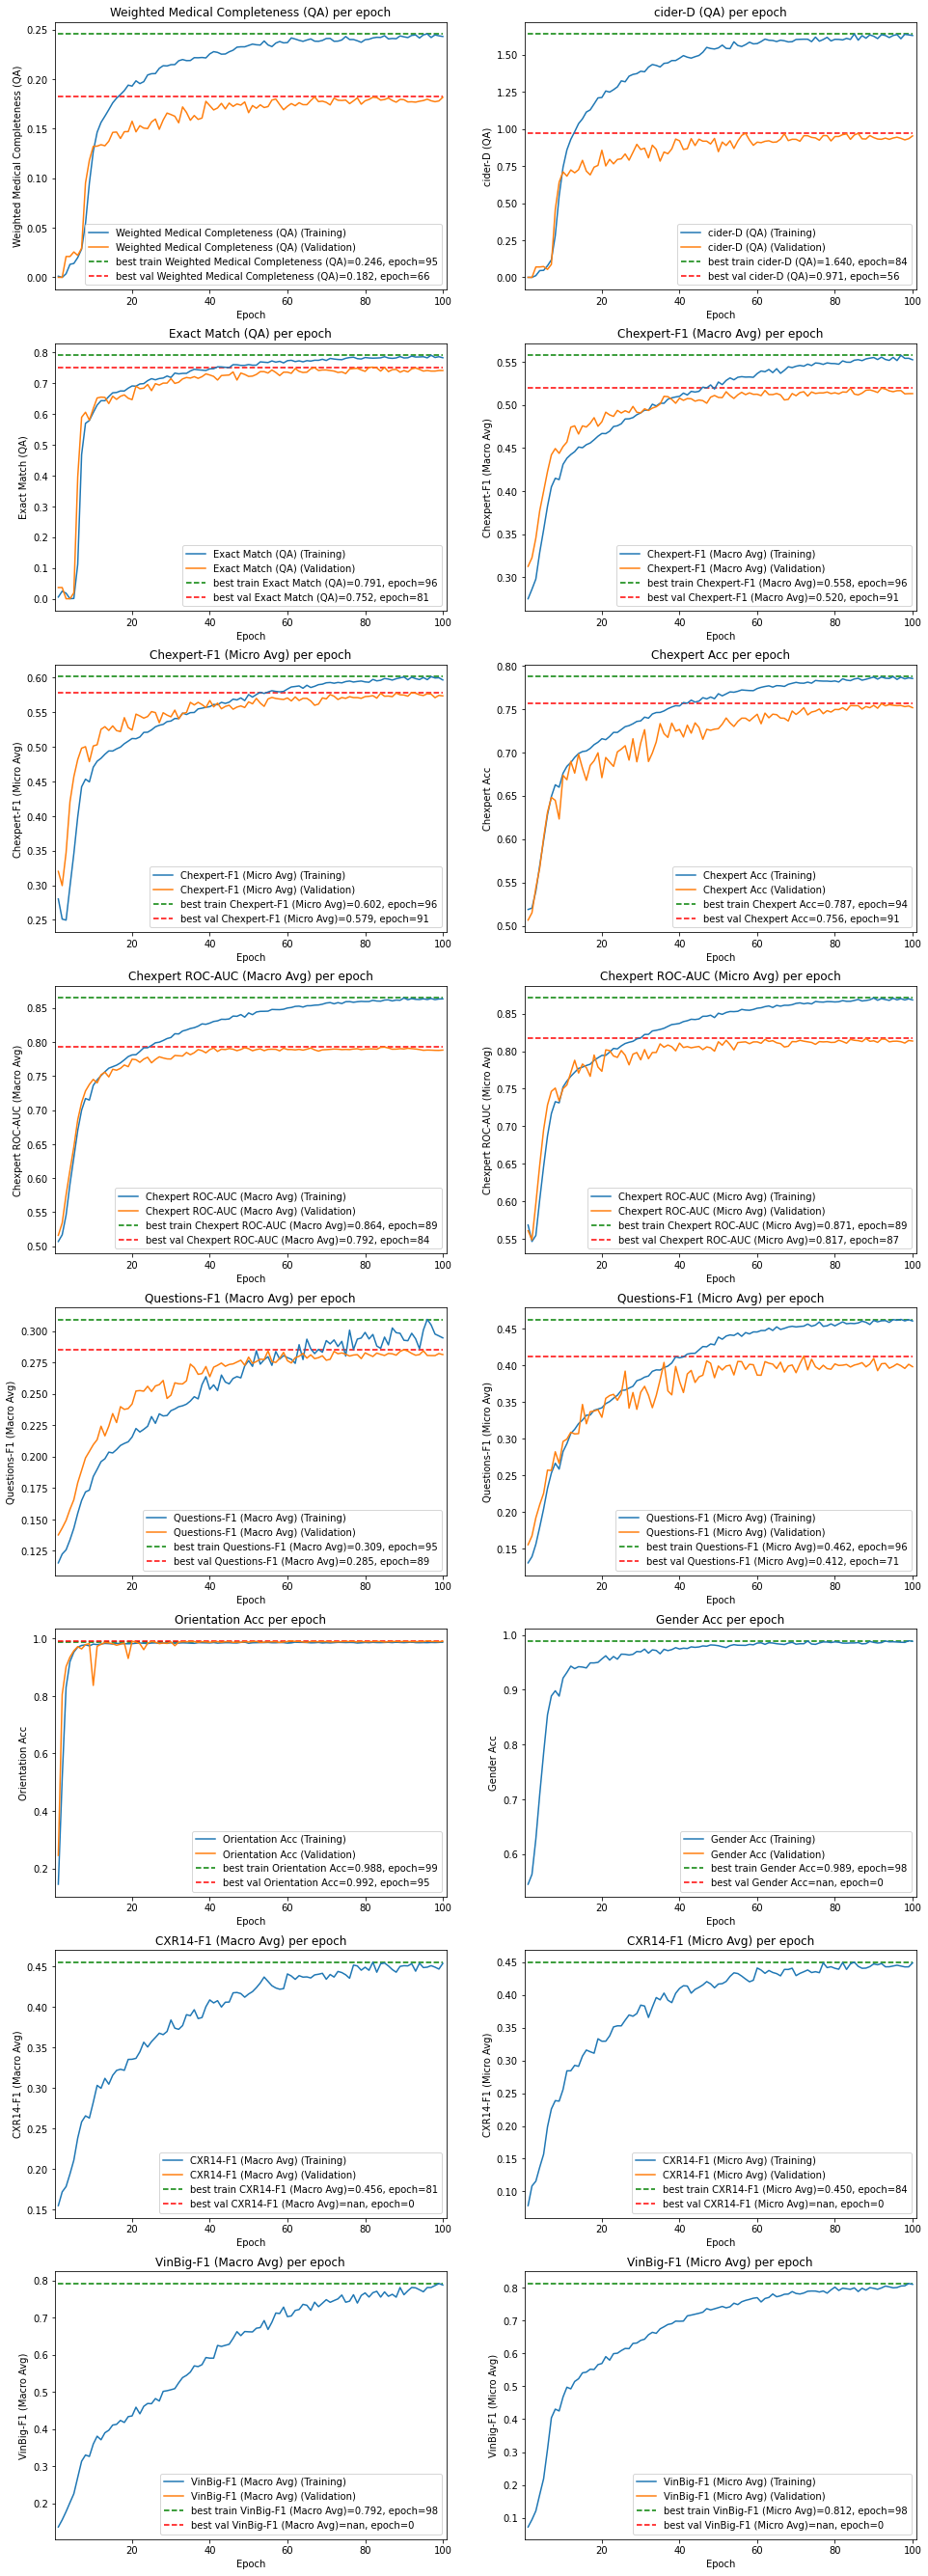

In [19]:
plot_train_val_curves('/home/pamessina/medvqa-workspace/models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/metrics_logs.csv',
                 [MetricNames.WMEDCOMP, MetricNames.CIDER_D, MetricNames.EXACTMATCH_ANSWER,
                  MetricNames.CHXLABELMACROAVGF1, MetricNames.CHXLABELMICROAVGF1,
                  MetricNames.CHXLABELACC,
                  MetricNames.CHXLABEL_ROCAUC_MACRO, MetricNames.CHXLABEL_ROCAUC_MICRO,                  
                  MetricNames.QLABELS_MACROAVGF1, MetricNames.QLABELS_MICROAVGF1,
                  MetricNames.ORIENACC, MetricNames.GENDER_ACC,
                  MetricNames.CXR14MACROAVGF1, MetricNames.CXR14MICROAVGF1,
                  MetricNames.VINBIGMACROAVGF1, MetricNames.VINBIGMICROAVGF1,
                 ],
                 ['Weighted Medical Completeness (QA)', 'cider-D (QA)', 'Exact Match (QA)',
                  'Chexpert-F1 (Macro Avg)', 'Chexpert-F1 (Micro Avg)',
                  'Chexpert Acc',
                  'Chexpert ROC-AUC (Macro Avg)', 'Chexpert ROC-AUC (Micro Avg)',                  
                  'Questions-F1 (Macro Avg)', 'Questions-F1 (Micro Avg)',
                  'Orientation Acc', 'Gender Acc',
                  'CXR14-F1 (Macro Avg)', 'CXR14-F1 (Micro Avg)',
                  'VinBig-F1 (Macro Avg)', 'VinBig-F1 (Micro Avg)',                  
                 ],
                 single_plot_figsize=(8,6))

# Test Set Evaluation


# Report-level Results

In [25]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp" \
        --eval-mode "ground-truth" \
        --no-iuxray \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 7

script's arguments:
   checkpoint_folder: models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp
   eval_mode: ground-truth
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
   max_processes_for_chexpert_labeler: 7
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Loading iuxray and mimiccxr QA adapted reports ...
-------------------

Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 1 finished, elapsed time = 628.4572393894196
	**** process 2 finished, elapsed time = 628.4574122428894
Generating LALR tables
Generating LALR tables
	**** process 3 finished, elapsed time = 663.010960817337
	**** process 4 finished, elapsed time = 663.0110657215118
	**** process 5 finished, elapsed time = 663.0111305713654
	**** process 6 finished, elapsed time = 663.0111846923828
	**** process 7 finished, elapsed time = 663.0112388134003
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl


In [26]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp" \
        --eval-mode "chexpert-labels" \
        --no-iuxray \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 7

script's arguments:
   checkpoint_folder: models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp
   eval_mode: chexpert-labels
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
   max_processes_for_chexpert_labeler: 7
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Loading iuxray and mimiccxr QA adapted reports ...
----------------

Generating LALR tables
Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 1 finished, elapsed time = 95.23585867881775
	**** process 2 finished, elapsed time = 95.23597979545593
	**** process 3 finished, elapsed time = 95.2360258102417
	**** process 4 finished, elapsed time = 95.23607039451599
	**** process 5 finished, elapsed time = 95.2361192703247
Generating LALR tables
Generating LALR tables
	**** process 6 finished, elapsed time = 102.8945825099945
	**** process 7 finished, elapsed time = 102.89467573165894
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl


In [27]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp" \
        --eval-mode "question-classification" \
        --qclass-threshold 0.5 \
        --n-questions-per-report 20 \
        --no-iuxray \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 7

script's arguments:
   checkpoint_folder: models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp
   eval_mode: question-classification
   n_questions_per_report: 20
   qclass_threshold: 0.5
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
   max_processes_for_chexpert_labeler: 7
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220822_095024_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_orien_chx_ql_amp/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Loading iuxray and mimiccxr QA adapted reports ...
--------

	#### process 6: running chexpert labeler over 467 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20220823_132129_0.2437310497803512_5.csv --output_path /data/labeler-output_20220823_132129_0.2437310497803512_5.csv
	#### process 7: running chexpert labeler over 467 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20220823_132129_0.2437310497803512_6.csv --output_path /data/labeler-output_20220823_132129_0.2437310497803512_6.csv
Generating LALR tables
	**** process 1 finished, elapsed time = 1800.4647109508514
Generating LALR tables
Generating LALR tables
Generating LALR tables
Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 2 finished, elapsed time = 1934.0667324066162
	**** process 3 finished, elapsed time = 19